In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
X_train,X_test,y_train,y_test = train_test_split(df[iris.feature_names], df['target'], test_size = 0.2, random_state = 42)

Model Fitting Using cross_val_score 

In [4]:
number_of_trees = [5,10,50,150,200]
acc_cross = []
times = []
for i in number_of_trees:
    clf_cross = GradientBoostingClassifier(n_estimators = i, random_state = 42)
    t0 = time.process_time()
    scores = cross_val_score(clf_cross, X_train, y_train, cv = 10)
    t1 = time.process_time()
    acc_cross.append(scores.mean())
    times.append(t1 - t0)

In [5]:
for depth, acc, t in zip(number_of_trees, acc_cross, times):
    print("For %r number of trees, Accuracy is %0.3f in %0.4f seconds" %(depth,acc,t))

For 5 number of trees, Accuracy is 0.933 in 0.1250 seconds
For 10 number of trees, Accuracy is 0.933 in 0.1250 seconds
For 50 number of trees, Accuracy is 0.925 in 0.5781 seconds
For 150 number of trees, Accuracy is 0.917 in 1.5469 seconds
For 200 number of trees, Accuracy is 0.917 in 1.7344 seconds


Text(0, 0.5, 'Cross Validation Score Mean Accuracy(%)')

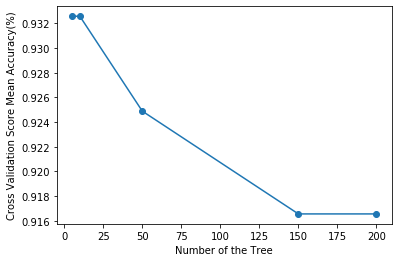

In [6]:
%matplotlib inline
plt.plot(number_of_trees,acc_cross,"-o")
plt.xlabel('Number of the Tree')
plt.ylabel('Cross Validation Score Mean Accuracy(%)')